In [1]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
import sklearn

ImportError: No module named seaborn

In [ ]:
df=pd.read_csv("/Users/ebby/Downloads/Rainfall_new.csv - Rainfall_new.csv.csv")

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("YEAR").sum().hist(figsize=(13,8),color="red")

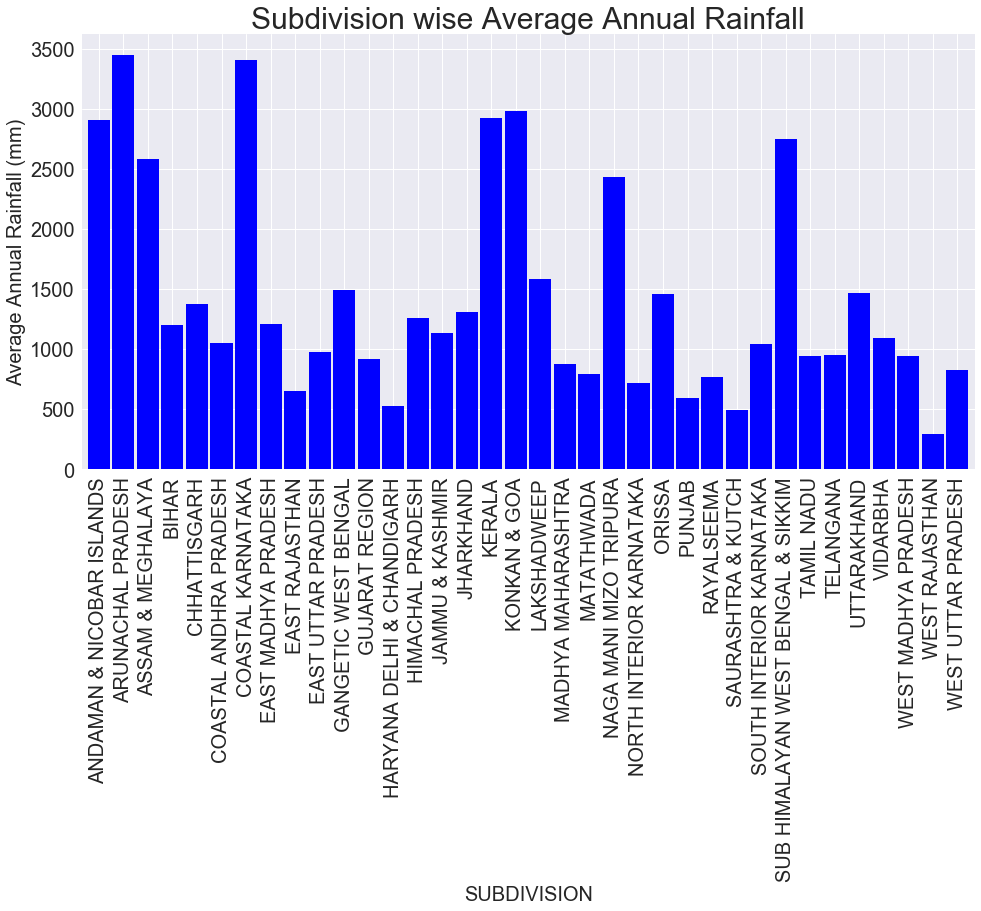

In [6]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
df.groupby('SUBDIVISION').mean()['ANNUAL'].plot('bar', color='b',width=0.9,title='Subdivision wise Average Annual Rainfall', fontsize=20)
plt.xticks(rotation = 90)
plt.ylabel('Average Annual Rainfall (mm)')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

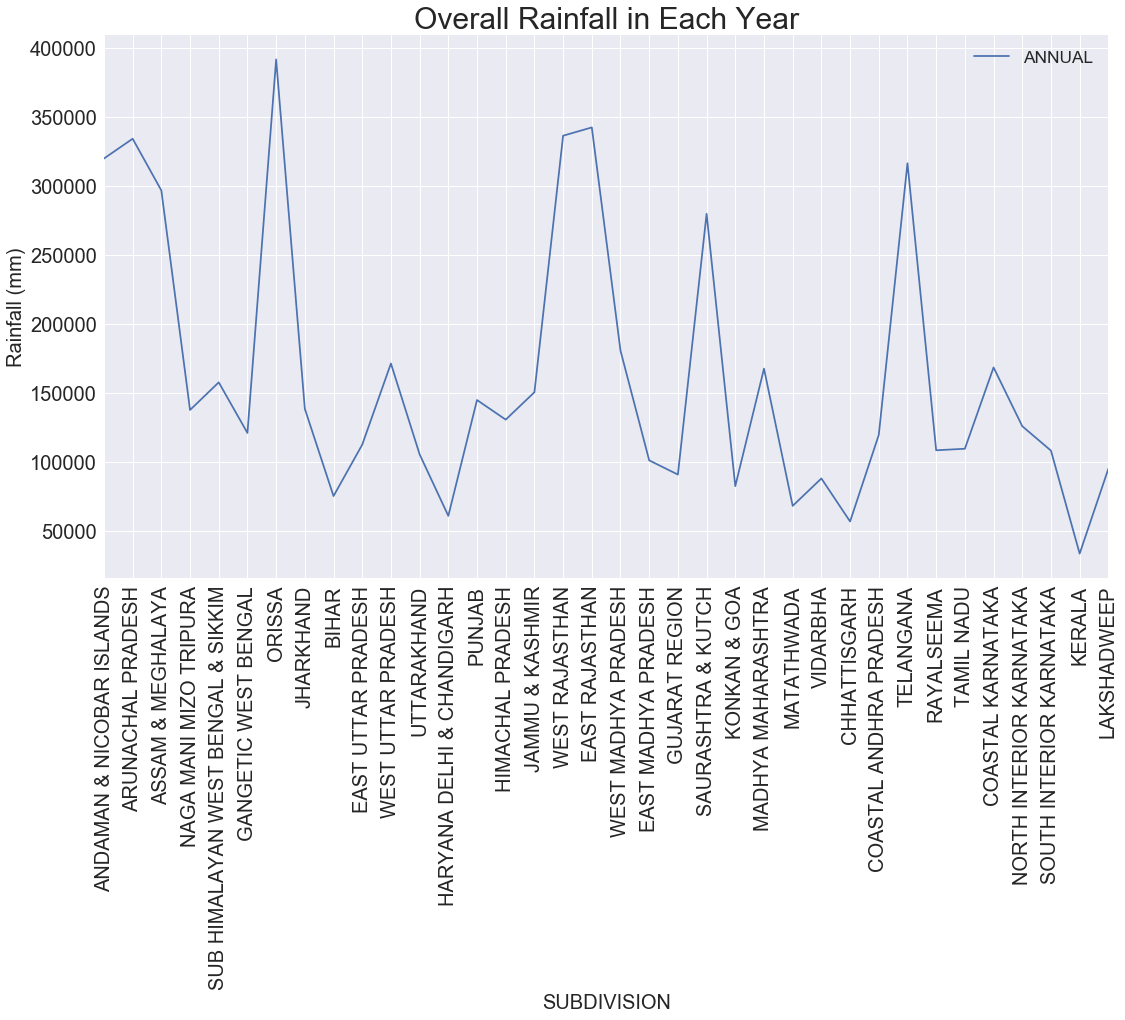

In [7]:
x=df.columns[14]
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
xlbls = df['SUBDIVISION'].unique()
dfg = df.groupby('SUBDIVISION').sum()[x]
dfg.plot.line(title='Overall Rainfall in Each Year', ax=ax,fontsize=20)
plt.xticks(np.linspace(0,35,36,endpoint=True),xlbls)
plt.xticks(  rotation = 90)
plt.ylabel('Rainfall (mm)')
plt.legend(loc='upper right', fontsize = 'xx-large')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

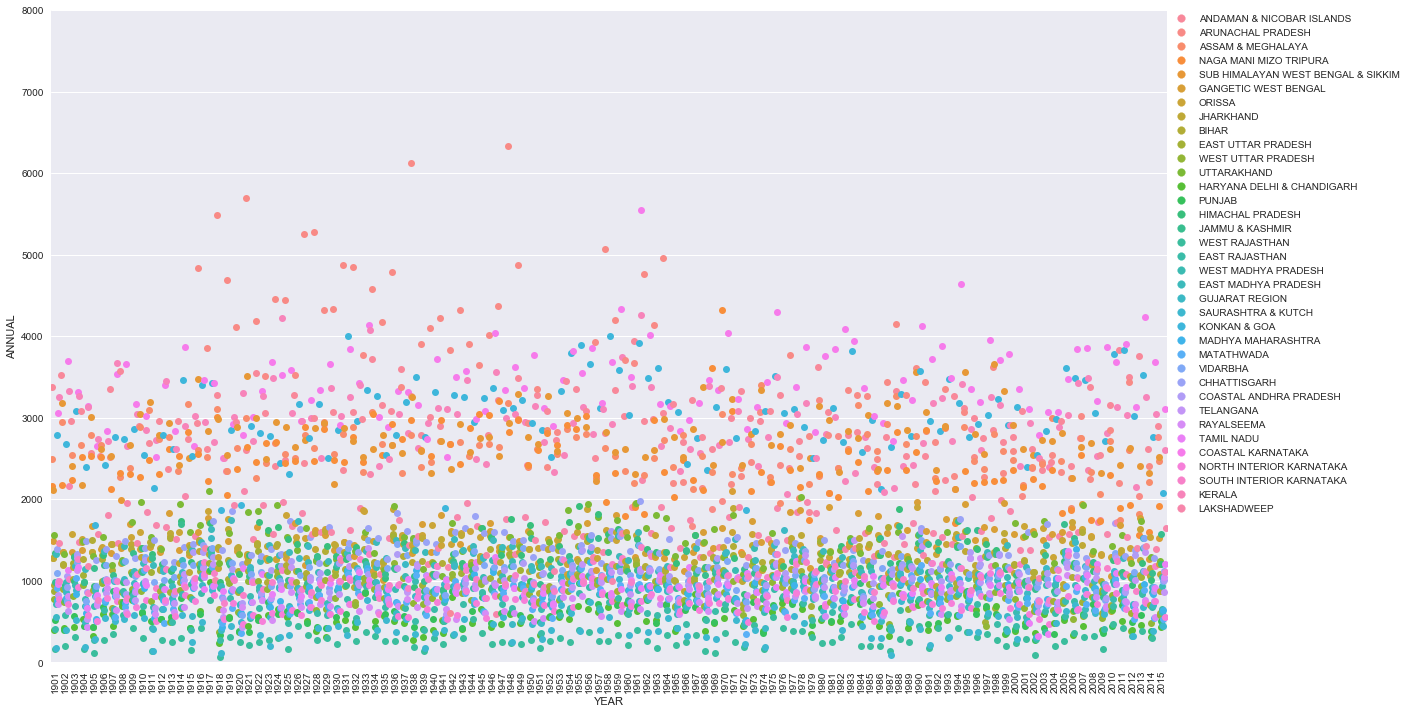

In [25]:
plt.figure(figsize=(20, 12))

# Adjust the y-axis
plt.ylim(0, 8000)
df.groupby("SUBDIVISION")
# Organize by type [split], make points larger [size]
g=sns.swarmplot(
    data=df, x='YEAR', y='ANNUAL', hue='SUBDIVISION', split=True, size=7);
plt.xticks(rotation = 90)
#g.set_xticklabels(labels = df["YEAR"].index.tolist(),rotation=30)
#g.set_xticklabels(rotation=30)
# Move legend out of the way
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.);

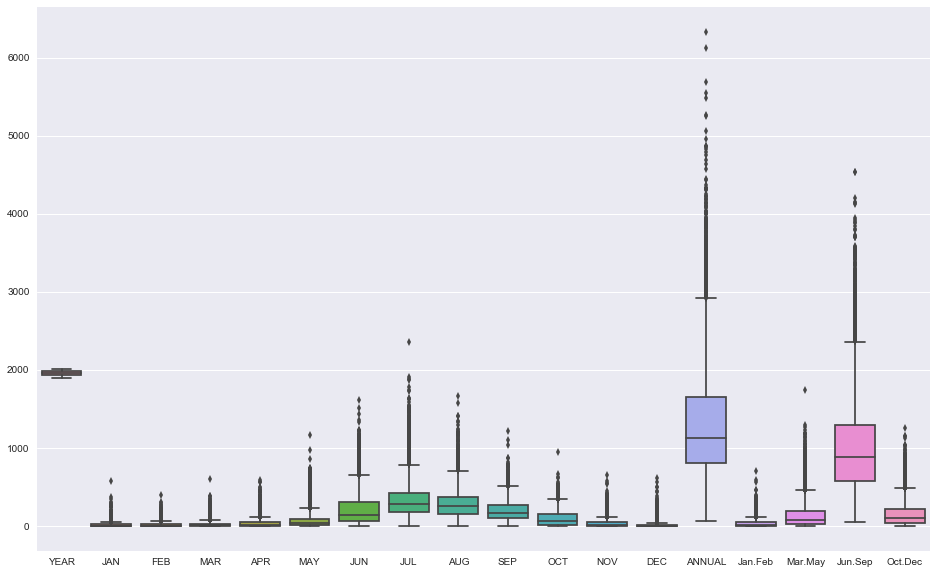

In [5]:
plt.figure(figsize=(16, 10))
sns.boxplot(data=df)

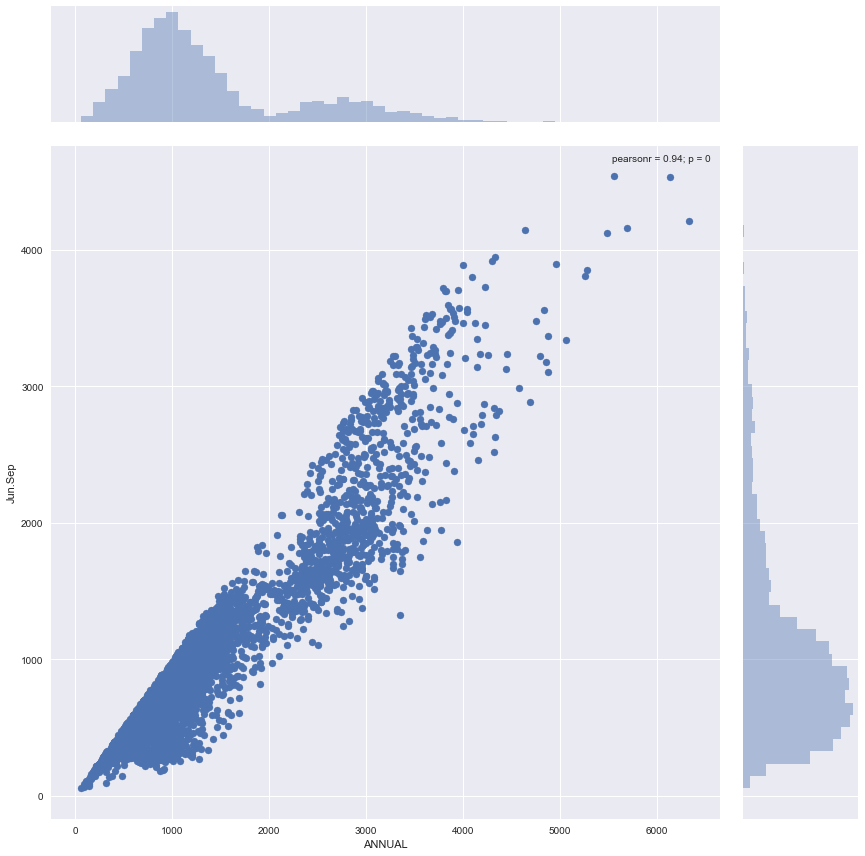

In [24]:
df["YEAR"]=df["YEAR"].astype(int)
df["ANNUAL"]=df["ANNUAL"].astype(int)
plt.figure(figsize=(20,10))
sns.jointplot(x="ANNUAL",y="Jun.Sep",data=df,size=12)

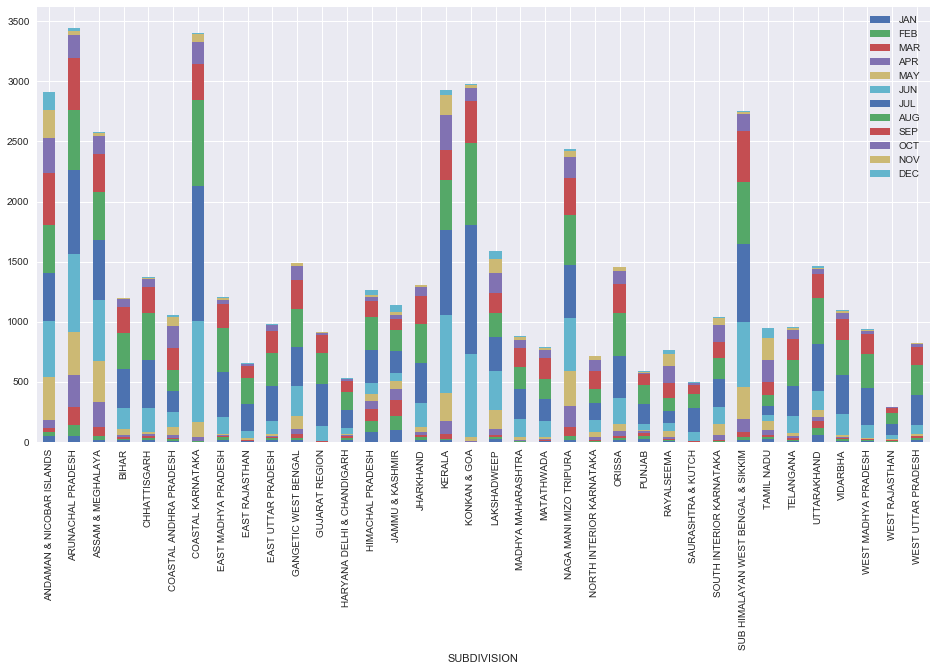

In [21]:
df[['SUBDIVISION', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("SUBDIVISION").mean().plot.bar(stacked=True,figsize=(16,8))

In [16]:
months = df.columns[2:14]
print(months)

Index(['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT',
       'NOV', 'DEC'],
      dtype='object')


Overall  (Training): 83.9714018225
Overall MAD (Testing): 84.586359306


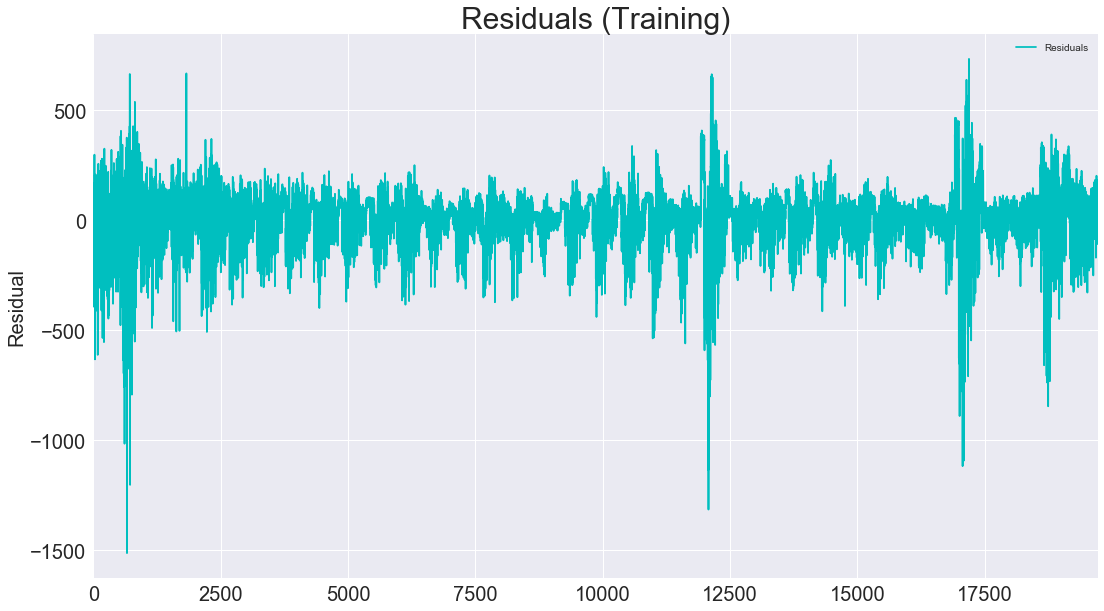

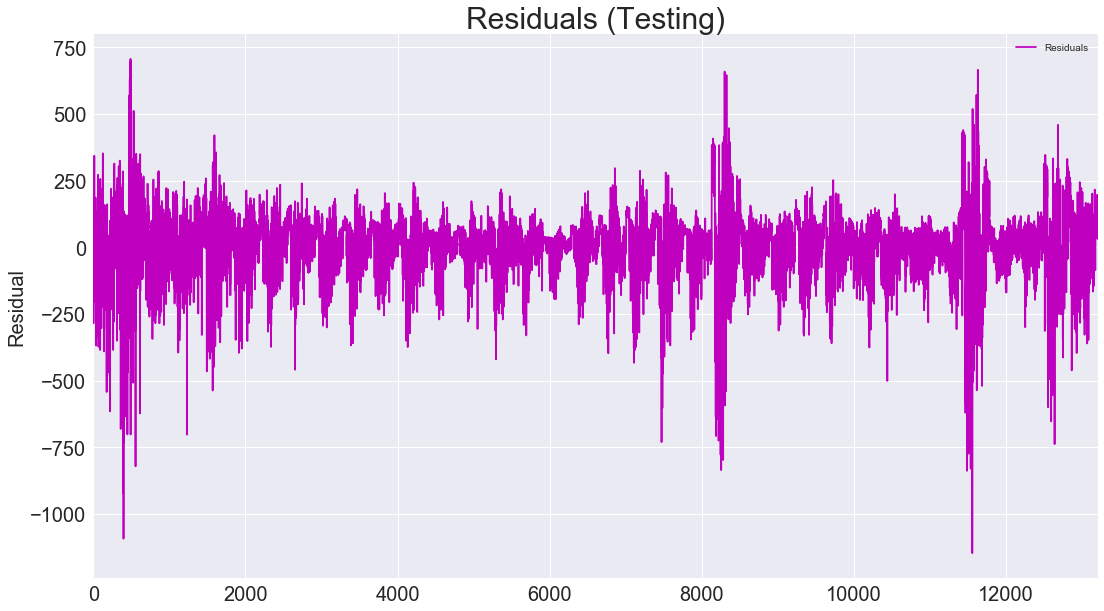

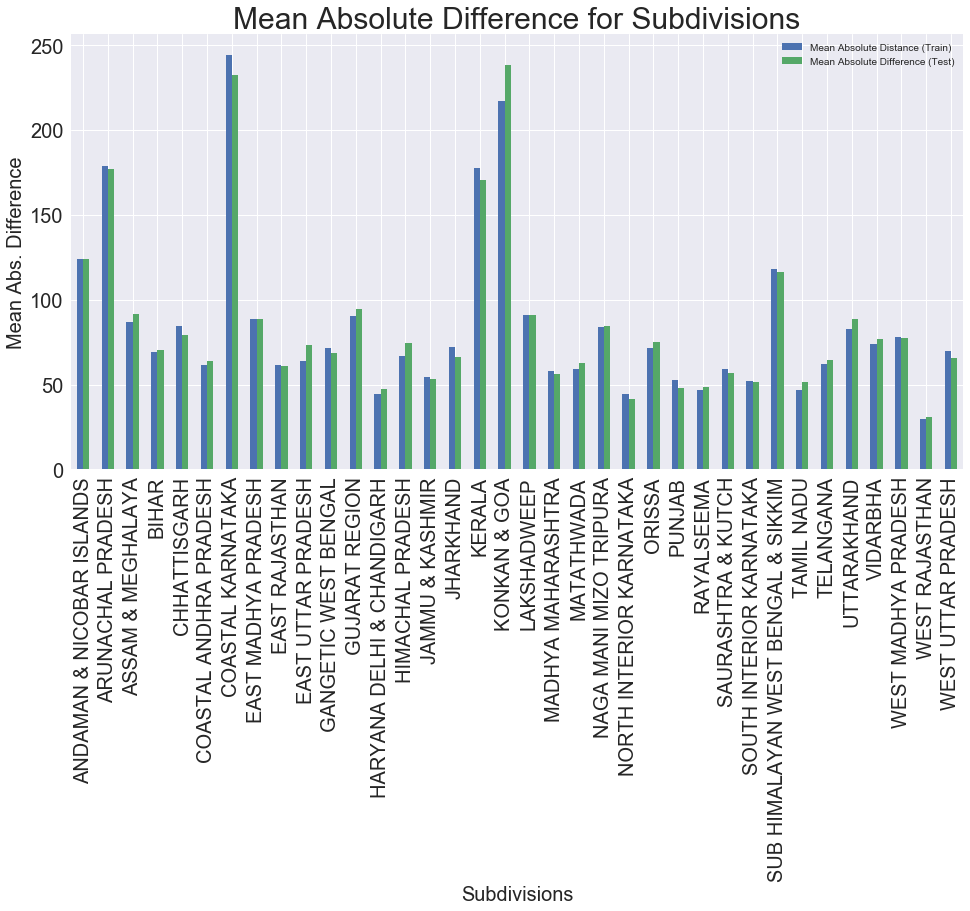

In [17]:
subdivs = df['SUBDIVISION'].unique()
num_of_subdivs = subdivs.size

df_res_training = pd.DataFrame(columns=np.array(['Residuals']))
df_res_testing = pd.DataFrame(columns=np.array(['Residuals']))
list_mad_training = []
mean_abs_diff_training = 0
list_mad_testing = []
mean_abs_diff_testing = 0
for subd in subdivs:
    df1 = df[df['SUBDIVISION']==subd]
    df2 = df1[[months[0],months[1],months[2],months[3],months[4]]]
    df2.columns = np.array(['x1','x2','x3','x4','x5'])
    for k in range(1,8):
        df3 = df1[[months[k],months[k+1],months[k+2],months[k+3],months[k+4]]]
        df3.columns = np.array(['x1','x2','x3','x4','x5'])
        df2 = df2.append(df3)
    df2.index = range(df2.shape[0])
    msk = np.random.rand(len(df2)) < 0.6
    df_train = df2[msk]
    df_test = df2[~msk]
    df_train.index = range(df_train.shape[0])
    df_test.index = range(df_test.shape[0])
    reg = linear_model.LinearRegression()
    reg.fit(df_train.drop('x5',axis=1),df_train['x5'])
    
    predicted_values = reg.predict(df_train.drop('x5',axis=1))
    residuals = predicted_values-df_train['x5'].values
    df_res_training = df_res_training.append(pd.DataFrame(residuals,columns=np.array(['Residuals'])))
    mean_abs_diff_training = mean_abs_diff_training + np.sum(np.abs(residuals))
    list_mad_training.append(np.mean(np.abs(residuals)))
                                                                                                        
    predicted_values = reg.predict(df_test.drop('x5',axis=1))
    residuals = predicted_values-df_test['x5'].values
    df_res_testing = df_res_testing.append(pd.DataFrame(residuals,columns=np.array(['Residuals'])))
    mean_abs_diff_testing = mean_abs_diff_testing + np.sum(np.abs(residuals))
    list_mad_testing.append(np.mean(np.abs(residuals)))
    
    
df_res_training.index = range(df_res_training.shape[0])
mean_abs_diff_training = mean_abs_diff_training/df_res_training.shape[0]
print('Overall  (Training): ' + str(mean_abs_diff_training))
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
df_res_training.plot.line(title='Residuals (Training)', color='c',ax=ax,fontsize=20)
#ax.xaxis.set_ticklabels([])
plt.ylabel('Residual')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

df_res_testing.index = range(df_res_testing.shape[0])
mean_abs_diff_testing = mean_abs_diff_testing/df_res_testing.shape[0]
print('Overall MAD (Testing): ' + str(mean_abs_diff_testing))
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
df_res_testing.plot.line(title='Residuals (Testing)', color='m',ax=ax,fontsize=20)
#ax.xaxis.set_ticklabels([])
plt.ylabel('Residual')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)


pd_mad = pd.DataFrame(data=list_mad_training,columns=["Mean Absolute Distance (Train)"])
pd_mad["Mean Absolute Difference (Test)"] = list_mad_testing;
pd_mad['Subdivisions'] = subdivs;
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
#pd_mad.groupby('Subdivisions').mean().plot(title='Overall Rainfall in Each Month of Year', ax=ax,fontsize=20)
pd_mad.groupby('Subdivisions').mean().plot.bar( width=0.5,title='Mean Absolute Difference for Subdivisions',ax=ax, fontsize=20)
plt.xticks(rotation = 90)
plt.ylabel('Mean Abs. Difference')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)